In [59]:
import sys
sys.path.append('../..')

In [60]:
import pathlib
import numpy
import numpy.fft
import scipy.signal
import matplotlib.pyplot

In [61]:
import eaglecore.io
import eaglecore.filters.linear
import eaglecore.filters.nolinear
import eaglecore.metrics

In [62]:
original = eaglecore.io.read(
    data_path = pathlib.Path('../images/coat_of_arms.png')
)

mean_filter = eaglecore.filters.linear.mean_filter(size=(20, 20))

blurred = scipy.signal.convolve2d(
    in1=original, 
    in2=mean_filter, 
    mode='same'
)

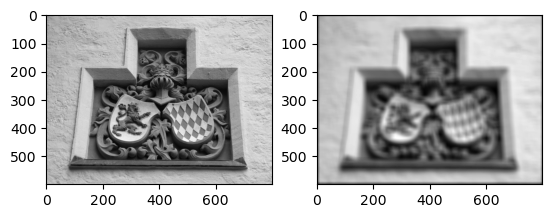

In [63]:
matplotlib.pyplot.figure()

matplotlib.pyplot.subplot(1, 2, 1)
matplotlib.pyplot.imshow(original, cmap='gray')

matplotlib.pyplot.subplot(1, 2, 2)
matplotlib.pyplot.imshow(blurred, cmap='gray')

matplotlib.pyplot.show()
matplotlib.pyplot.close()


In [64]:
pad = numpy.array(original.shape) - numpy.array(mean_filter.shape)
padded_mean_filter= numpy.pad(
    array = mean_filter, 
    pad_width =[ (0, i) for i in pad ]
)

In [65]:
img_fft = numpy.fft.fftn(original)
pmf_fft = numpy.fft.fftn(padded_mean_filter)

In [66]:
k = 1.0
result_fft = eaglecore.filters.nolinear.wiener(
    image = img_fft,
    kernel = pmf_fft,
    k = k,
    use_fft = False
)

result = numpy.real(numpy.fft.ifftn(result_fft))

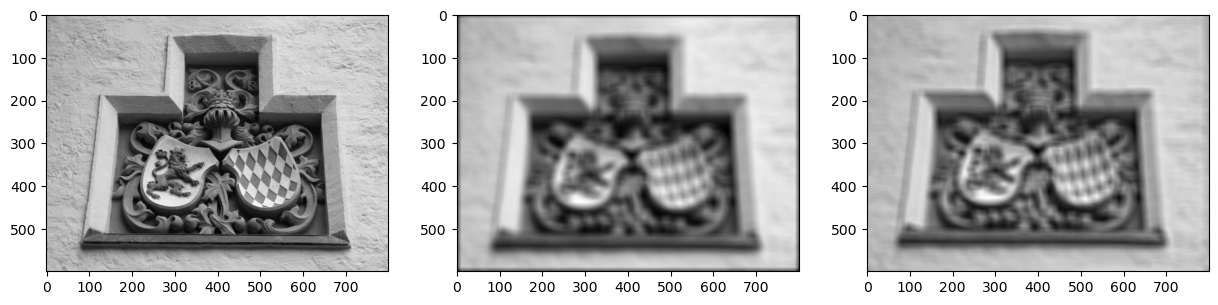

In [67]:
matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(1, 3, 1)
matplotlib.pyplot.imshow(original, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 2)
matplotlib.pyplot.imshow(blurred, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 3)
matplotlib.pyplot.imshow(result, cmap='gray')

matplotlib.pyplot.show()
matplotlib.pyplot.close()

$\begin{align}
\hat{Y}(u,v) = \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y'(u, v)
% \hat{Y}(u,v) = \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y(u, v)
\end{align}$

<!-- $\begin{align}
\frac{d}{dK} \hat{Y}(u,v) 
&= \frac{d}{dK} \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y(u, v) \\
&= -\frac{1}{|H(u, v)|^{2} + K} \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y(u, v) \\
&= -\frac{1}{|H(u, v)|^{2} + K} \hat{Y}(u,v)
\end{align}$ -->

---

$\begin{align}
MSE(Y(u, v), \hat{Y}(u, v))
&= \frac{1}{N \times M} \sum\limits_{u, v}^{M, N} (Y(u, v) - \hat{Y}(u, v))^{2} \\
&= \frac{1}{N \times M}  [ (Y(0, 0) - \hat{Y}(0, 0))^{2} + \cdots + (Y(M, N) - \hat{Y}(M, N))^{2} ] \\
% &= \frac{1}{N \times M}  [ 
%     (Y(0, 0) - \frac{\bar{H}(0, 0)}{|H(0, 0)|^{2} + K} Y'(0, 0))^{2} 
%     + \cdots 
%     + (Y(M, N) - \frac{\bar{H}(M, N)}{|H(M, N)|^{2} + K} Y'(M, N))^{2} 
% ]
% &= \frac{d}{dK} \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y(u, v) \\
% &= -\frac{1}{|H(u, v)|^{2} + K} \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y(u, v) \\
% &= -\frac{1}{|H(u, v)|^{2} + K} \hat{Y}(u,v)
\end{align}$

---

<!-- $\begin{align}
MSE(Y(u, v), \hat{Y}(u, v))
&= \frac{1}{N \times M} \sum\limits_{u, v}^{M, N} (Y(u, v) - \hat{Y}(u, v))^{2} \\
&= \frac{1}{N \times M}  [ (Y(0, 0) - \hat{Y}(0, 0))^{2} + \cdots + (Y(M, N) - \hat{Y}(M, N))^{2} ] \\
% &= \frac{1}{N \times M}  [ 
%     (Y(0, 0) - \frac{\bar{H}(0, 0)}{|H(0, 0)|^{2} + K} Y'(0, 0))^{2} 
%     + \cdots 
%     + (Y(M, N) - \frac{\bar{H}(M, N)}{|H(M, N)|^{2} + K} Y'(M, N))^{2} 
% ]
% &= \frac{d}{dK} \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y(u, v) \\
% &= -\frac{1}{|H(u, v)|^{2} + K} \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y(u, v) \\
% &= -\frac{1}{|H(u, v)|^{2} + K} \hat{Y}(u,v)
\end{align}$ -->

$\begin{align}
\frac{d}{dK} MSE(Y(u, v), \hat{Y}(u, v))
&= \frac{d}{dK} ~ \frac{1}{N \times M} \sum\limits_{u, v}^{M, N} (Y(u, v) - \hat{Y}(u, v))^{2} \\
&= \frac{1}{N \times M} ~ \frac{d}{dK} ~ \sum\limits_{u, v}^{M, N} (Y(u, v) - \hat{Y}(u, v))^{2} \\
&= \frac{1}{N \times M} \sum\limits_{u, v}^{M, N} ~ \frac{d}{dK} ~ (Y(u, v) - \hat{Y}(u, v))^{2} \\
% &= \frac{d}{dK} \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y(u, v) \\
% &= -\frac{1}{|H(u, v)|^{2} + K} \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y(u, v) \\
% &= -\frac{1}{|H(u, v)|^{2} + K} \hat{Y}(u,v)
\end{align}$

---

$\begin{align}
\frac{d}{dK} (Y(u, v) - \hat{Y}(u, v))^2
&= \frac{d}{dK} (Y(u, v) - \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y'(u, v))^2 \\
&= 2 \times (- \frac{\bar{H}(u, v)}{(|H(u, v)|^{2} + K)^{2}} Y'(u, v)) \times (Y(u, v) - \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y'(u, v)) \\
&= 2 \times (- \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} \hat{Y}(u, v)) \times (Y(u, v) - \hat{Y}(u, v))
% &= \frac{d}{dK} \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y(u, v) \\
% &= -\frac{1}{|H(u, v)|^{2} + K} \frac{\bar{H}(u, v)}{|H(u, v)|^{2} + K} Y(u, v) \\
% &= -\frac{1}{|H(u, v)|^{2} + K} \hat{Y}(u,v)
\end{align}$

---

In [71]:
# def criterion(y: numpy.ndarray, y_estim: numpy.ndarray) -> float:
#     return eaglecore.metrics.mse(y, y_estim)

# def dcriterion(y: numpy.ndarray, y_estim: numpy.ndarray) -> float:
#     return 2* (y - y)


nb_epoch = 100
k = 1
lr = 1e-1

for i in range(0, nb_epoch):
    
    result_fft = eaglecore.filters.nolinear.wiener(
        image = img_fft,
        kernel = pmf_fft,
        k = k,
        use_fft = False
    )

    
    
    frac = - pmf_fft.conj() / (numpy.abs(pmf_fft)**2 + k)
    diff = img_fft - result_fft
    dmse = (2 * frac * result_fft * diff)
    dmse =  numpy.real(numpy.fft.ifftn(dmse))
    dmse = dmse.sum()
    
    k = k - lr * dmse
    
    result = numpy.real(numpy.fft.ifftn(result_fft))
    
    mse = eaglecore.metrics.mse(original, result)
    if i % 10 == 0:
        print('Iteration {} : k = {}; mse = {}'.format(i, k, mse))
    

Iteration 0 : k = 1945949759.3662388; mse = 0.10516025319590393
Iteration 10 : k = 1945949759.3662388; mse = 0.3837339352795719
Iteration 20 : k = 1945949759.3662388; mse = 0.3837339352795719
Iteration 30 : k = 1945949759.3662388; mse = 0.3837339352795719
Iteration 40 : k = 1945949759.3662388; mse = 0.3837339352795719
Iteration 50 : k = 1945949759.3662388; mse = 0.3837339352795719
Iteration 60 : k = 1945949759.3662388; mse = 0.3837339352795719
Iteration 70 : k = 1945949759.3662388; mse = 0.3837339352795719
Iteration 80 : k = 1945949759.3662388; mse = 0.3837339352795719
Iteration 90 : k = 1945949759.3662388; mse = 0.3837339352795719


$\begin{align}
I_{3} &= \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \\
\end{align}$

---

$\begin{align}
\hat{Y}_{\alpha}(u, v) &= \alpha I_{3} \\
Y &= 3 I_{3}
\end{align}$

---

$\begin{align}
MSE(Y(u, v), \hat{Y}(u, v))
&= \frac{1}{N \times M} \sum\limits_{u, v}^{M, N} (Y(u, v) - \hat{Y}(u, v))^{2} \\
&= \frac{1}{N \times M}  [ (Y(0, 0) - \hat{Y}(0, 0))^{2} + \cdots + (Y(M, N) - \hat{Y}(M, N))^{2} ] \\
\end{align}$

---

$\begin{align}
\frac{d}{d\alpha} MSE(Y(u, v), ~ \hat{Y}_{\alpha}(u, v))
&= \frac{d}{d\alpha} ~ \frac{1}{N \times M} \sum\limits_{u, v}^{M, N} (Y(u, v) - \hat{Y}_{\alpha}(u, v))^{2} \\
&= \frac{1}{N \times M} ~ \frac{d}{d\alpha} ~ \sum\limits_{u, v}^{M, N} (Y(u, v) - \hat{Y}_{\alpha}(u, v))^{2} \\
&= \frac{1}{N \times M} \sum\limits_{u, v}^{M, N} ~ \frac{d}{d\alpha} ~ (Y(u, v) - \hat{Y}_{\alpha}(u, v))^{2}
\end{align}$

---

$\begin{align}
\frac{d}{d\alpha} ~ (Y(u, v) - \hat{Y}_{\alpha}(u, v))^{2}
&= \frac{d}{d\alpha} (Y(u, v) - \alpha I_{3}(u, v))^2 \\
&= 2 \times (- I_{3}(u, v)) \times (Y(u, v) - \alpha I_{3}(u, v)) \\
\end{align}$

In [2]:
import sys
sys.path.append('../..')

In [3]:
import pathlib
import numpy
import numpy.fft
import scipy.signal
import matplotlib.pyplot

In [22]:
import eaglecore.io
import eaglecore.filters.linear
import eaglecore.filters.nolinear
import eaglecore.metrics

In [58]:
# I3 = numpy.eye(3, 3)
# Y = 3 * I3

I3 = numpy.arange(0, 9).reshape((3, 3))
Y = 3*I3

print(Y)

def f(alpha, x) -> numpy.ndarray:
    return alpha * x

nb_epoch = 100
# lr = 1.0
lr_alpha = 1e-2
lr_x = 1.0

alpha = 0
x = I3
# x = numpy.zeros(shape=(3, 3))
# alpha = numpy.random.rand()
# alpha = 3
# x = numpy.random.rand(3, 3)

mse_history = []
alpha_history = []
for i in range(0, nb_epoch):
    
    Y_hat = f(alpha, I3)
    
    
    # grad_mse_by_alpha = (2 * (-I3) * (Y - Y_hat)).sum() / numpy.prod(numpy.array(Y.shape))
    # grad_mse_by_I3 = (2 * (-alpha * numpy.ones(shape=Y.shape)) * (Y - Y_hat)).sum() / numpy.prod(numpy.array(Y.shape))
    
    grad_mse_by_alpha = (2 * (-x) * (Y - Y_hat)).sum() / numpy.prod(numpy.array(Y.shape))
    # grad_mse_by_x = (2 * (-alpha * numpy.ones(shape=Y.shape)) * (Y - Y_hat)).sum() / numpy.prod(numpy.array(Y.shape))
    
    
    alpha = alpha - lr_alpha * grad_mse_by_alpha
    # x = x - lr_x * grad_mse_by_x
    
    mse = eaglecore.metrics.mse(Y, Y_hat)
    
    mse_history.append(mse)
    alpha_history.append(alpha)
    
    if i % 10 == 0:
        print('Epoch {} : alpha = {} ; mse = {} ; x = {}'.format(i, alpha, mse, x))
        
    
print(Y_hat)
    



[[ 0  3  6]
 [ 9 12 15]
 [18 21 24]]
Epoch 0 : alpha = 1.36 ; mse = 204.0 ; x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
Epoch 10 : alpha = 2.9960909629984527 ; mse = 0.0011589962585555466 ; x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
Epoch 20 : alpha = 2.999990682579098 ; mse = 6.584668271197028e-09 ; x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
Epoch 30 : alpha = 2.999999977791376 ; mse = 3.740983291641584e-14 ; x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
Epoch 40 : alpha = 2.999999999947064 ; mse = 2.1254013210829447e-19 ; x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
Epoch 50 : alpha = 2.999999999999874 ; mse = 1.208745269706649e-24 ; x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
Epoch 60 : alpha = 2.9999999999999996 ; mse = 5.368636716087441e-30 ; x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
Epoch 70 : alpha = 2.9999999999999996 ; mse = 5.368636716087441e-30 ; x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
Epoch 80 : alpha = 2.9999999999999996 ; mse = 5.368636716087441e-30 ; x = [[0 1 2]
 [3 4 5]
 [6 7 8]]
Epoch 90 : alpha = 2.9999999999999996 ; mse = 5.368636716087441e-30 ; x = [[0 1

In [32]:
import matplotlib.pyplot

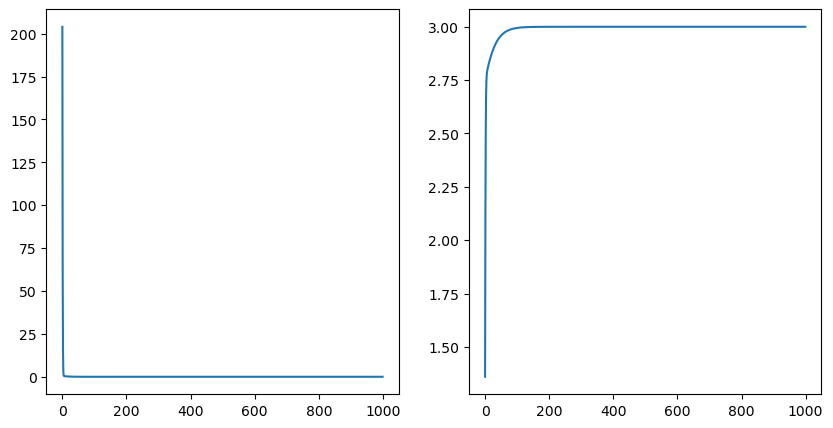

In [33]:
matplotlib.pyplot.figure(figsize=(10, 5))

matplotlib.pyplot.subplot(1, 2, 1)
matplotlib.pyplot.plot(mse_history)

matplotlib.pyplot.subplot(1, 2, 2)
matplotlib.pyplot.plot(alpha_history)

matplotlib.pyplot.show()
matplotlib.pyplot.close()

In [15]:
# I3 = numpy.eye(3, 3)
# Y = 3 * I3

A = numpy.arange(0, 9).reshape((3, 3))
X = numpy.arange(0, 3)
Y = A @ X


def f(A) -> numpy.ndarray:
    return alpha * I3

nb_epoch = 100
# lr = 1.0
lr = 1e-2

alpha = 0

mse_history = []
alpha_history = []
for i in range(0, nb_epoch):
    
    Y_hat = f(alpha)
    
    grad_mse = (2 * (-I3) * (Y - A * I3)).sum() / numpy.prod(numpy.array(Y.shape))
    
    alpha = alpha - lr * grad_mse
    
    mse = eaglecore.metrics.mse(Y, Y_hat)
    
    mse_history.append(mse)
    alpha_history.append(alpha)
    
    if i % 10 == 0:
        print('Epoch {} : alpha = {} ; mse = {}'.format(i, alpha, mse))
        
    
print(Y_hat)

TypeError: randint() takes at least 1 positional argument (0 given)

$\begin{align}
I_{3} &= \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} \\
\end{align}$

---

$\begin{align}
\hat{Y}_{\alpha}(u, v) &= I_{3} \\
Y &= A I_{3}
\end{align}$

---

$\begin{align}
MSE(Y(u, v), \hat{Y}(u, v))
&= \frac{1}{N \times M} \sum\limits_{u, v}^{M, N} (Y(u, v) - \hat{Y}(u, v))^{2} \\
&= \frac{1}{N \times M}  [ (Y(0, 0) - \hat{Y}(0, 0))^{2} + \cdots + (Y(M, N) - \hat{Y}(M, N))^{2} ] \\
\end{align}$

---

$\begin{align}
\frac{d}{d\alpha} MSE(Y(u, v), ~ \hat{Y}_{\alpha}(u, v))
&= \frac{d}{d\alpha} ~ \frac{1}{N \times M} \sum\limits_{u, v}^{M, N} (Y(u, v) - \hat{Y}_{\alpha}(u, v))^{2} \\
&= \frac{1}{N \times M} ~ \frac{d}{d\alpha} ~ \sum\limits_{u, v}^{M, N} (Y(u, v) - \hat{Y}_{\alpha}(u, v))^{2} \\
&= \frac{1}{N \times M} \sum\limits_{u, v}^{M, N} ~ \frac{d}{d\alpha} ~ (Y(u, v) - \hat{Y}_{\alpha}(u, v))^{2}
\end{align}$

---

$\begin{align}
\frac{d}{d\alpha} ~ (Y(u, v) - \hat{Y}_{\alpha}(u, v))^{2}
&= \frac{d}{d\alpha} (Y(u, v) - \alpha I_{3}(u, v))^2 \\
&= 2 \times (- I_{3}(u, v)) \times (Y(u, v) - \alpha I_{3}(u, v)) \\
\end{align}$